# Exploratory Data Analysis with Real Data (but more advanced technique)

## 1. Set up

In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import tensorflow as tf
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Administrator\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Administrator\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
column_names = [
    'Date Time',
    'S1-Batt Volt',
    'S1-PTemp',
    'S1-Salt',
    'S1-SpCond',
    'S1-Temp',
    'S2-Batt Volt',
    'S2-PTemp',
    'S2-Salt',
    'S2-SPCond',
    'S2-Temp',
    'S2-Wiper cur',
    'S2-Wiper pos',
    'S3-Batt Volt',
    'S3-PTemp',
    'S3-Salt'
]

# get data file names
path = r'../../datasets/real'
filenames = glob.glob(path + "/*.csv")

pdlst = []
for filepath in filenames:
    pdlst.append(pd.read_csv(filepath, header=2, names=column_names, parse_dates=['Date Time']))

df = pd.concat(pdlst)
df

,Date Time,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
0,2021-01-09 18:00:00,12.48,22.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-11 08:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-11 08:30:00,12.48,26.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-11 08:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-11 08:50:00,12.46,27.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,2021-06-19 15:00:00,13.17,35.00,0.13,0.31,31.48,13.22,39.14,0.11,0.24,31.02,0.72,44.82,NaN,NaN,NaN
23640,2021-06-19 15:00:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.06,40.42,0.13
23641,2021-06-19 15:10:00,13.17,34.75,0.13,0.31,31.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23642,2021-06-19 15:20:00,13.22,34.50,0.13,0.31,31.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop the first row (day was far from others)
df.drop(index=0, inplace=True)

In [4]:
# Set DateTime as index
df.set_index('Date Time', inplace=True)

In [5]:
df.describe()

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
count,22257.000000,22257.000000,22212.000000,22212.000000,22212.000000,7569.000000,7569.000000,7545.000000,7157.000000,7087.000000,7569.000000,7569.000000,7560.000000,7560.000000,7528.000000
mean,13.064338,29.899616,2.526008,4.974372,29.361293,12.899586,35.924471,1.640496,3.327212,29.250916,31.362771,11.038699,12.907698,35.874942,1.812964
std,0.278916,4.365920,2.891254,4.619590,2.772213,0.380234,4.378299,1.639237,3.246223,1.673656,18.439043,16.167777,0.387524,3.793442,1.662905
min,12.380000,20.000000,-99.990000,-99.990000,-99.990000,11.570000,25.610000,0.000000,0.000000,0.000000,0.000000,0.000000,11.680000,27.260000,0.100000
25%,12.840000,26.750000,0.260000,0.610000,27.850000,12.600000,32.720000,0.130000,0.279000,27.670000,1.590000,1.380000,12.590000,33.080000,0.340000
50%,12.980000,28.750000,2.150000,4.410000,29.930000,12.780000,34.830000,1.320000,2.545000,29.330000,41.350000,1.380000,12.780000,34.940000,1.370000
75%,13.230000,33.500000,4.430000,8.580000,30.750000,13.150000,39.420000,2.730000,5.672000,30.610000,43.360000,31.870000,13.180000,38.800000,2.720000
max,14.180000,42.250000,9.370000,17.370000,32.690000,14.140000,52.380000,27.050000,14.010000,32.630000,60.140000,58.160000,14.110000,48.380000,12.370000


In [6]:
# Remove erronous value
df.replace(-99.99, np.nan, inplace=True)

In [7]:
# Remove outliers
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

df = df.apply(replace_outliers)
df.describe()

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
count,22257.000000,22257.000000,22205.000000,22205.000000,22205.000000,7569.000000,7569.000000,7545.000000,7157.000000,7087.000000,7569.000000,7569.000000,7560.000000,7560.000000,7528.000000
mean,13.052208,29.899616,2.557352,5.007461,29.403680,12.901753,35.855081,1.610734,3.272311,29.259167,31.362771,11.038699,12.906946,35.861179,1.722399
std,0.260119,4.365920,2.245330,4.227633,1.539781,0.371846,4.270830,1.572209,3.162910,1.600327,18.439043,16.167777,0.385607,3.773148,1.495353
min,12.380000,20.000000,0.000000,0.000000,25.140000,12.280000,25.610000,0.000000,0.000000,25.160000,0.000000,0.000000,11.790000,27.260000,0.100000
25%,12.840000,26.750000,0.260000,0.610000,27.860000,12.600000,32.720000,0.130000,0.279000,27.670000,1.590000,1.380000,12.590000,33.080000,0.340000
50%,12.980000,28.750000,2.150000,4.410000,29.930000,12.780000,34.830000,1.320000,2.545000,29.330000,41.350000,1.380000,12.780000,34.940000,1.370000
75%,13.220000,33.500000,4.430000,8.580000,30.750000,13.150000,39.360000,2.680000,5.589000,30.610000,43.360000,31.870000,13.180000,38.770000,2.640000
max,13.900000,42.250000,9.280000,17.370000,32.690000,14.040000,49.020000,6.540000,13.050000,32.630000,60.140000,58.160000,14.070000,47.010000,6.790000


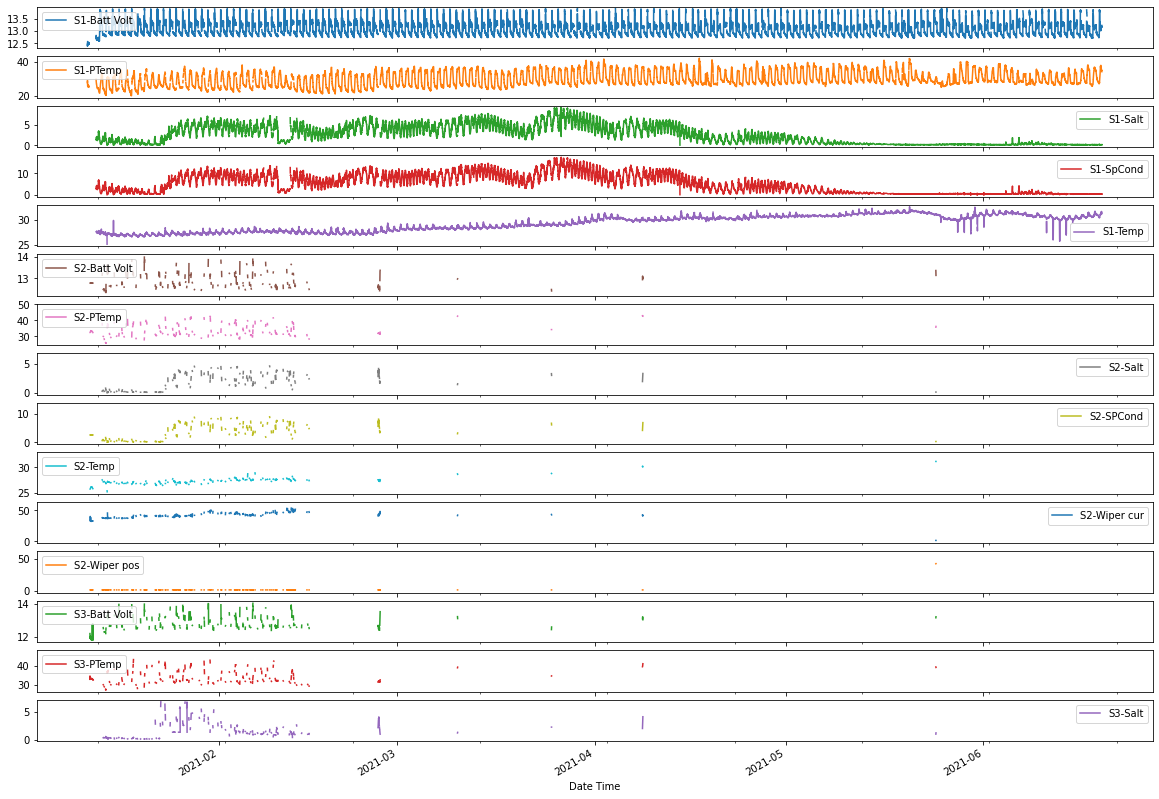

In [8]:
mpl.rcParams['figure.figsize'] = (20, 15)
_ = df.plot(subplots=True)

## 2. Advanced techniques

### 2.1. Resample time-series data

In [9]:
df = df.resample('1H').interpolate()
df

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
Date Time,,,,,,,,,,,,,,,
2021-01-11 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 09:00:00,12.38,28.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 10:00:00,12.48,25.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 11:00:00,12.50,25.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11 12:00:00,12.46,26.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 11:00:00,13.01,37.75,0.13,0.31,31.05,13.01,41.64,0.11,0.244,30.92,0.72,35.98,13.00,43.58,0.13
2021-06-19 12:00:00,13.07,37.50,0.13,0.32,31.33,13.00,40.85,0.11,0.241,31.03,0.80,36.00,13.15,43.90,0.13
2021-06-19 13:00:00,13.13,36.25,0.12,0.30,31.46,13.16,40.06,0.11,0.241,31.07,0.72,35.05,12.97,42.54,0.13


In [10]:
df.dropna(inplace=True)
df.shape

(3765, 15)

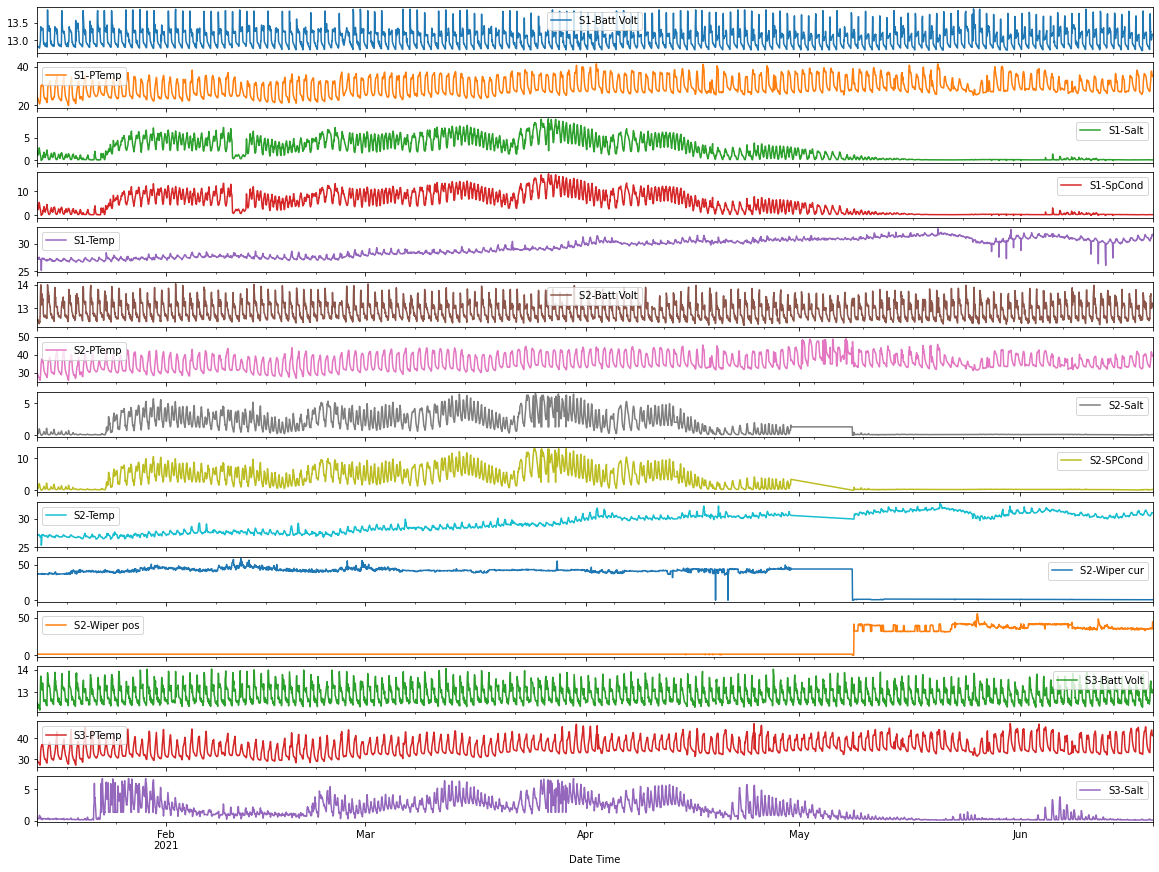

In [11]:
mpl.rcParams['figure.figsize'] = (20, 15)
_ = df.plot(subplots=True)

### 2.2. ARIMA model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. ARIMA is used in Unvariate Time Series Forecasting, i.e., we can predict the next value of a feature just based on the history of that feature only.

### 2.2.1. Stationarity

A timeseries is stationary if:
- The series has zero trend, no growing or shrinking.
- Variance is constant
- Autocorrelation is constant

We can check if a timeseries is stationary by doing Augmented Dicky-Fuller test.

In [12]:
from statsmodels.tsa.stattools import adfuller

df.apply(adfuller).iloc[1]

S1-Batt Volt         0.0
S1-PTemp        0.003818
S1-Salt         0.368691
S1-SpCond       0.402746
S1-Temp         0.715106
S2-Batt Volt         0.0
S2-PTemp        0.002945
S2-Salt         0.456744
S2-SPCond       0.468533
S2-Temp         0.593587
S2-Wiper cur    0.855798
S2-Wiper pos    0.858724
S3-Batt Volt         0.0
S3-PTemp        0.004987
S3-Salt         0.478632
Name: 1, dtype: object

The above Series show p-value of each features for the null hypothesis of non-stationarity. If p-value is small, we can reject the hypothesis that claims the timeseries is non-stationary.

`Batt Volt` and `PTemp` of each station are stationary, others do not. If we look at the graph, the model from May 2021 seems like to be change. So we may removed it.

### 2.2.2. Transform the data to be stationary

In [13]:
df_short = df.loc['2021-02-01':'2021-04-30']
df_short

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
Date Time,,,,,,,,,,,,,,,
2021-02-01 00:00:00,12.88,24.50,4.45,8.42,27.35,12.710,30.89,2.29,4.508000,27.200000,46.570,1.38,12.630,31.50,1.89
2021-02-01 01:00:00,12.85,24.25,4.24,8.04,27.30,12.680,30.90,2.16,4.256000,27.060000,45.880,1.38,12.670,31.46,2.18
2021-02-01 02:00:00,12.83,24.00,3.82,7.27,27.15,12.600,30.53,2.57,5.020000,27.220000,44.190,1.38,12.650,31.30,2.09
2021-02-01 03:00:00,12.83,23.75,4.25,8.00,26.99,12.555,30.28,3.27,6.290000,27.250000,44.515,1.38,12.550,31.10,1.85
2021-02-01 04:00:00,12.79,23.50,5.40,10.07,27.30,12.510,30.03,3.97,7.560000,27.280000,44.840,1.38,12.525,31.16,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 19:00:00,12.95,31.25,2.78,5.79,30.73,12.790,36.99,1.32,3.040423,30.497887,44.130,1.38,12.760,36.60,3.25
2021-04-30 20:00:00,12.89,29.75,2.73,5.68,30.64,12.770,35.55,1.32,3.023899,30.494883,44.130,1.38,12.740,35.78,2.46
2021-04-30 21:00:00,12.87,28.75,2.43,5.08,30.61,12.770,34.76,1.32,3.007375,30.491878,44.130,1.38,12.570,35.34,2.13


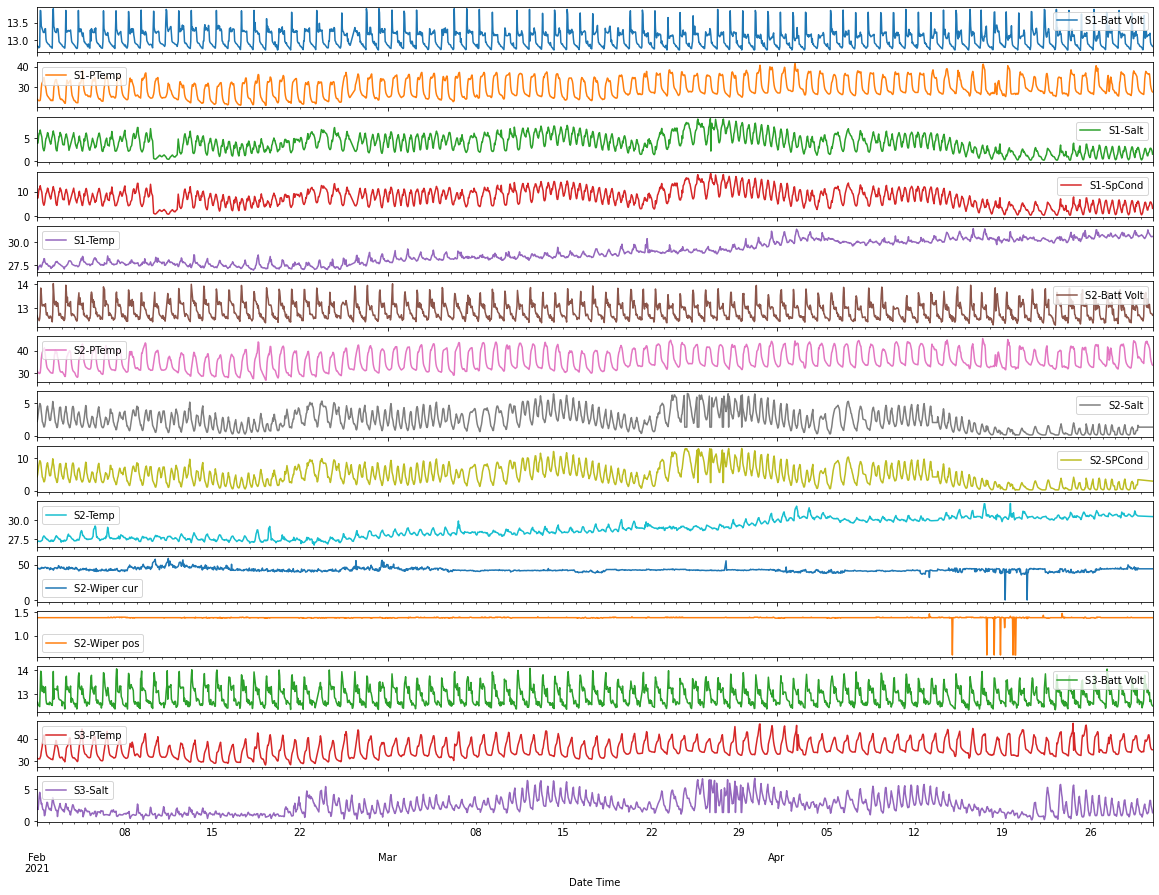

In [14]:
_ = df_short.plot(subplots=True)

In [15]:
df_short.apply(adfuller).iloc[1]

S1-Batt Volt    0.000005
S1-PTemp        0.184811
S1-Salt         0.394645
S1-SpCond       0.330288
S1-Temp         0.969034
S2-Batt Volt    0.000044
S2-PTemp         0.24552
S2-Salt          0.55718
S2-SPCond       0.536791
S2-Temp         0.891083
S2-Wiper cur    0.009507
S2-Wiper pos         0.0
S3-Batt Volt         0.0
S3-PTemp        0.224358
S3-Salt         0.568541
Name: 1, dtype: object

We will take the difference of all attributes.

In [16]:
df_diff = df_short.diff().dropna()
df_diff

,S1-Batt Volt,S1-PTemp,S1-Salt,S1-SpCond,S1-Temp,S2-Batt Volt,S2-PTemp,S2-Salt,S2-SPCond,S2-Temp,S2-Wiper cur,S2-Wiper pos,S3-Batt Volt,S3-PTemp,S3-Salt
Date Time,,,,,,,,,,,,,,,
2021-02-01 01:00:00,-0.03,-0.25,-0.21,-0.38,-0.05,-0.030,0.01,-0.13,-0.252000,-0.140000,-0.690,0.0,0.040,-0.04,0.29
2021-02-01 02:00:00,-0.02,-0.25,-0.42,-0.77,-0.15,-0.080,-0.37,0.41,0.764000,0.160000,-1.690,0.0,-0.020,-0.16,-0.09
2021-02-01 03:00:00,0.00,-0.25,0.43,0.73,-0.16,-0.045,-0.25,0.70,1.270000,0.030000,0.325,0.0,-0.100,-0.20,-0.24
2021-02-01 04:00:00,-0.04,-0.25,1.15,2.07,0.31,-0.045,-0.25,0.70,1.270000,0.030000,0.325,0.0,-0.025,0.06,1.02
2021-02-01 05:00:00,0.01,0.00,0.67,1.17,0.07,-0.040,-0.24,0.54,0.950000,-0.050000,-0.180,0.0,-0.025,0.06,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 19:00:00,-0.25,-3.00,0.09,0.18,-0.09,-0.120,-2.78,0.00,-0.016524,-0.003005,0.000,0.0,0.080,-1.55,-0.02
2021-04-30 20:00:00,-0.06,-1.50,-0.05,-0.11,-0.09,-0.020,-1.44,0.00,-0.016524,-0.003005,0.000,0.0,-0.020,-0.82,-0.79
2021-04-30 21:00:00,-0.02,-1.00,-0.30,-0.60,-0.03,0.000,-0.79,0.00,-0.016524,-0.003005,0.000,0.0,-0.170,-0.44,-0.33


In [17]:
df_diff.apply(adfuller).iloc[1]

S1-Batt Volt    0.0
S1-PTemp        0.0
S1-Salt         0.0
S1-SpCond       0.0
S1-Temp         0.0
S2-Batt Volt    0.0
S2-PTemp        0.0
S2-Salt         0.0
S2-SPCond       0.0
S2-Temp         0.0
S2-Wiper cur    0.0
S2-Wiper pos    0.0
S3-Batt Volt    0.0
S3-PTemp        0.0
S3-Salt         0.0
Name: 1, dtype: object

From the next section we will use `df_diff` as the training set.

### 2.2.3. Autocorrelation and Partial Autocorrelation

Autocorrelation represents the correlation of 1 features with the lag-n of itself. For example, to find lag-1 autocorrelation of feature a with datapoint {a1, a2, a3,...}, we may think of create another columns that show the next value of a day {a2, a3, a4,...} and get it correlation.

Partial correlation is different from autocorrelation by removing effect of previous days from lag-2 and more.

This is use to know if we should choose AR, MA or ARMA model with their degrees.

S1-Batt Volt


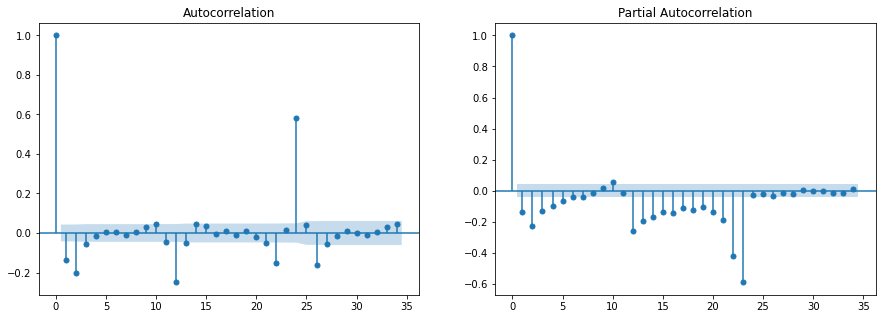

S1-PTemp


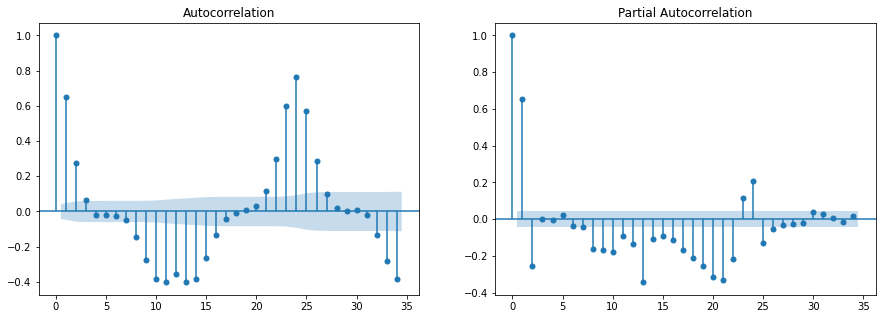

S1-Salt


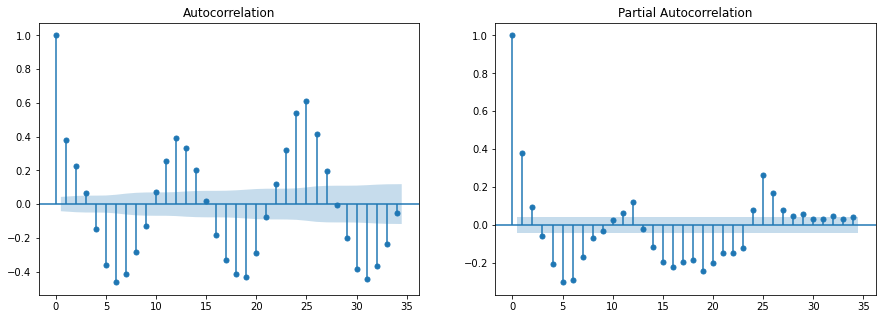

S1-SpCond


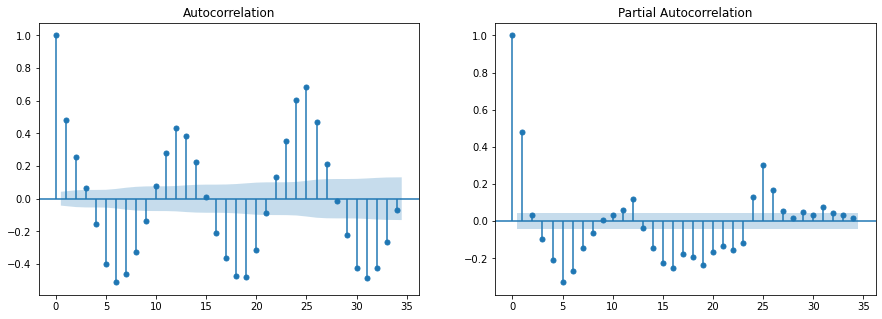

S1-Temp


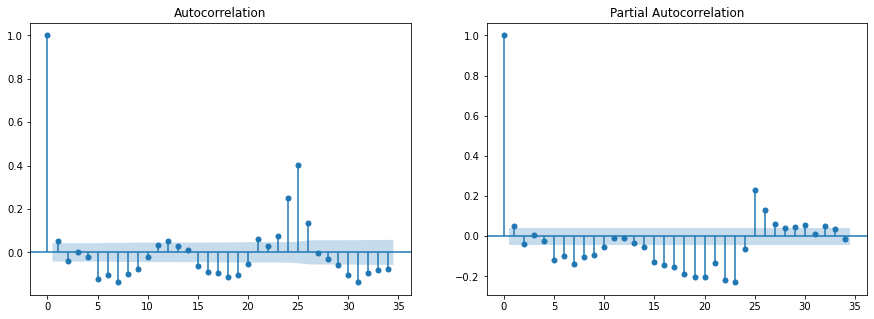

S2-Batt Volt


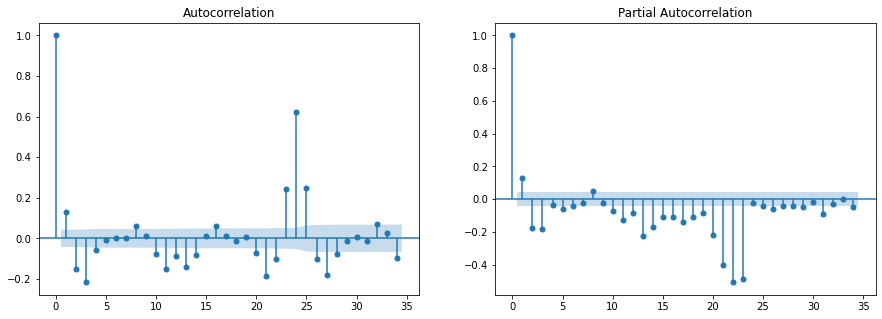

S2-PTemp


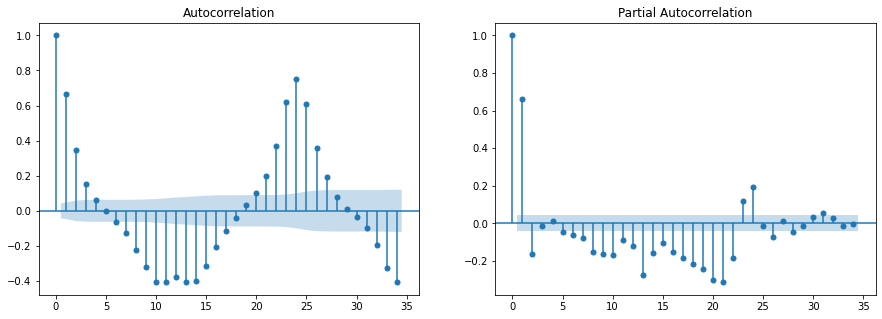

S2-Salt


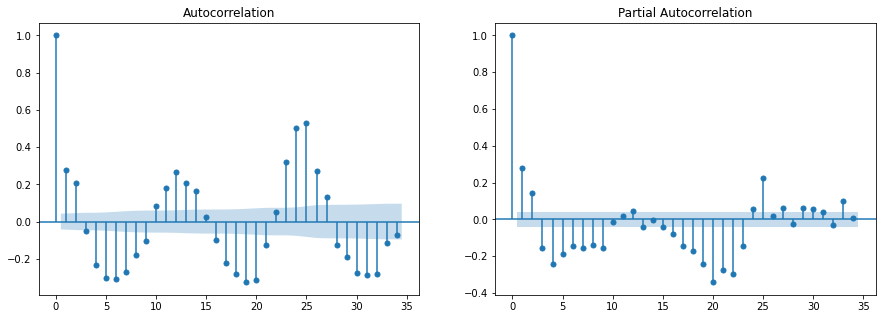

S2-SPCond


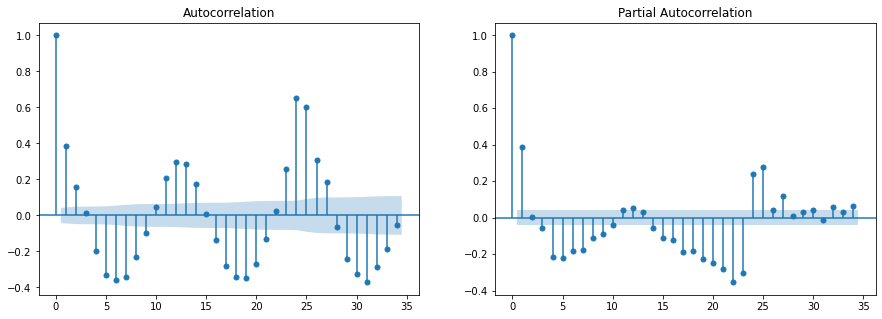

S2-Temp


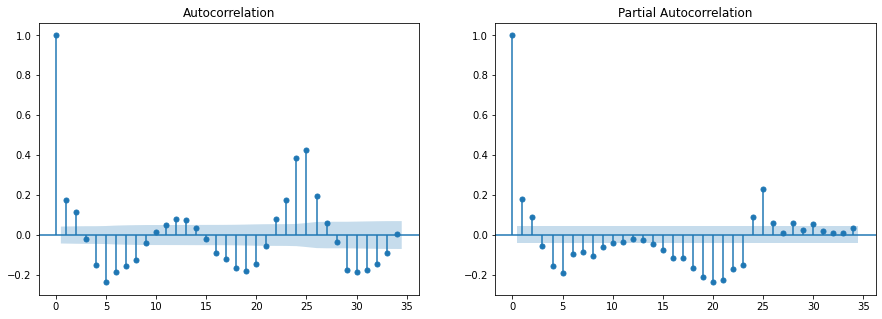

S2-Wiper cur


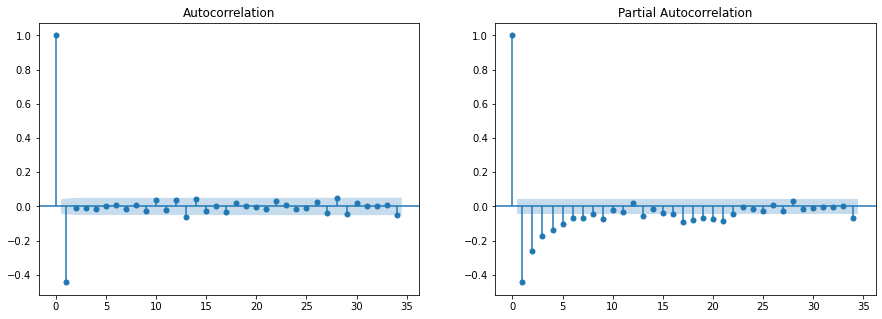

S2-Wiper pos


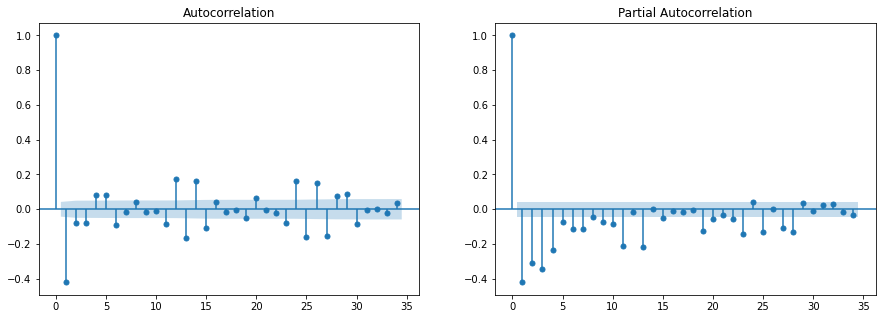

S3-Batt Volt


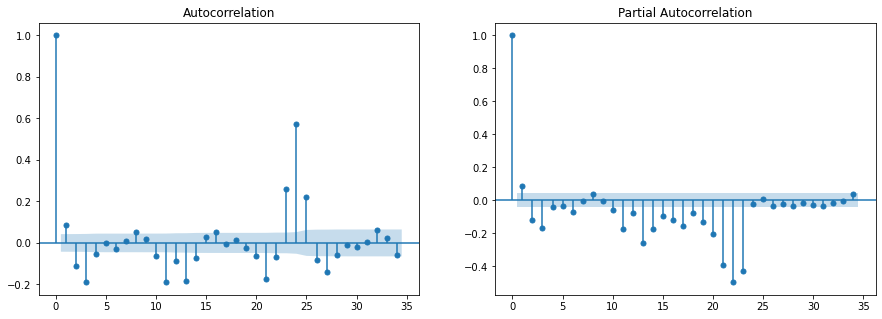

S3-PTemp


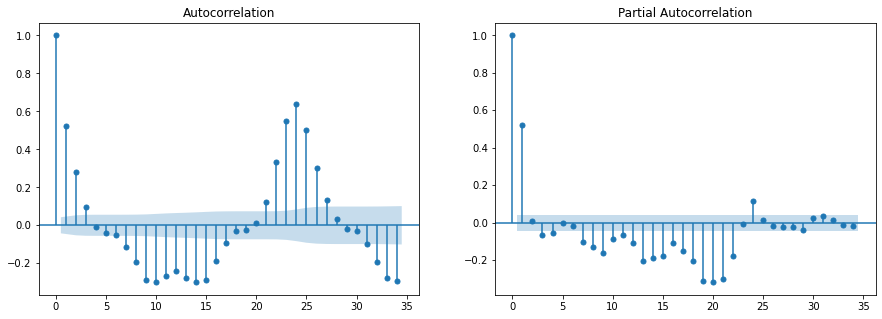

S3-Salt


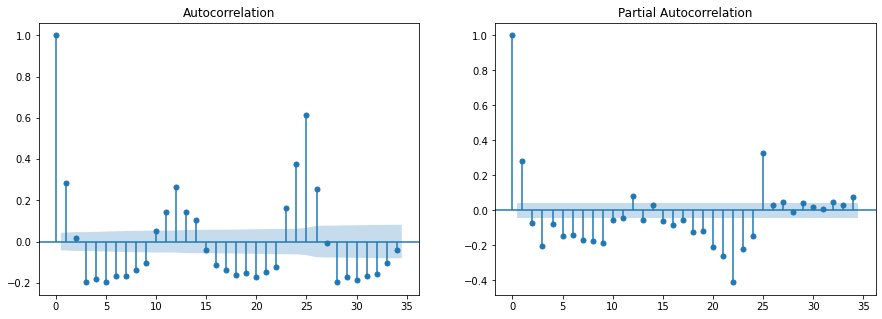

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mpl.rcParams['figure.figsize'] = (15, 5)

def plot_auto(series):
    print(series.name)
    fig, ax = plt.subplots(1, 2)
    plot_acf(series, ax=ax[0])
    plot_pacf(series, ax=ax[1])
    plt.show()

_ = df_diff.apply(plot_auto)

We can see that the ACF and PACF tails off but has high correlation at lag-24. So we may want to test with degree 24.

We may want to use AIC or BIC to evaluate the model and choose the model which fit the best. But it should take some times when you are testing with higher degree. The below code is tested from degree 0 to degree 4 only.

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order_aic_bic = []

# Loop over p values from 0-4
for p in range(5):
  # Loop over q values from 0-4
    for q in range(5):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df_diff['S1-Batt Volt'], order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC')[:3])

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC')[:3])

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\

    p  q         AIC         BIC
24  4  4 -995.017485 -944.021488
19  3  4 -959.849891 -914.520116
22  4  2 -897.033681 -857.370128
    p  q         AIC         BIC
24  4  4 -995.017485 -944.021488
19  3  4 -959.849891 -914.520116
7   1  2 -889.352155 -866.687267


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC and BIC both argee to choose p = 4 and q = 4. Let us try to fit this model with p,q = 4 and p,q = 24.

In [20]:
def get_prediction(results, last=40, steps=40, plot=True): 
    
    # Make arma predicts the last observed values
    forecast = results.get_prediction(start=-last)

    # Extract prediction mean
    mean_forecast = forecast.predicted_mean
    
    # Get confidence intervals of predictions
    confidence_intervals = forecast.conf_int()

    # Select lower and upper confidence limits
    lower_limits = confidence_intervals.loc[:,'lower S1-Batt Volt']
    upper_limits = confidence_intervals.loc[:,'upper S1-Batt Volt']

    # plot the observed data
    plt.plot(df_diff.index[-100:], df_diff['S1-Batt Volt'][-100:], label='observed')

    # plot your mean prediction
    plt.plot(mean_forecast.index, mean_forecast, color='r', label='predicted')

    # shade the area between your confidence limits
    plt.fill_between(mean_forecast.index, lower_limits, 
             upper_limits, color='pink')
    
    forecast = results.get_forecast(steps=steps)
    
    # Extract prediction mean
    mean_forecast = forecast.predicted_mean

    # Get confidence intervals of predictions
    confidence_intervals = forecast.conf_int()

    # Select lower and upper confidence limits
    lower_limits = confidence_intervals.loc[:,'lower S1-Batt Volt']
    upper_limits = confidence_intervals.loc[:,'upper S1-Batt Volt']

    # plot your mean forecast
    plt.plot(mean_forecast.index, mean_forecast, color='orange', label='forecast')

    # shade the area between your confidence limits
    plt.fill_between(mean_forecast.index, lower_limits, 
             upper_limits, color='yellow')
    
    # set legends and show plot
    plt.legend()
    
    return mean_forecast

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


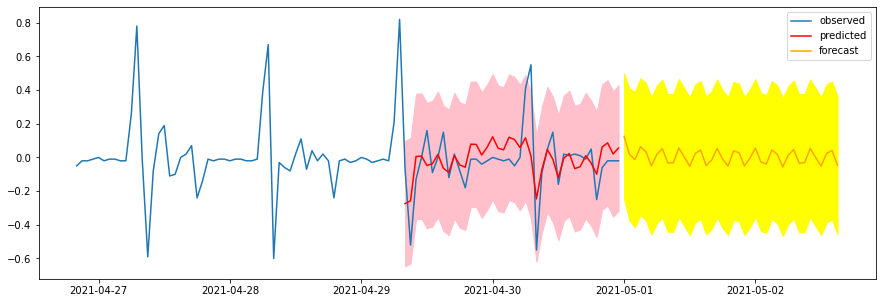

In [21]:
model = SARIMAX(df_diff['S1-Batt Volt'], order=(4,0,4))
results = model.fit()

mean_forecast_4 = get_prediction(results)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


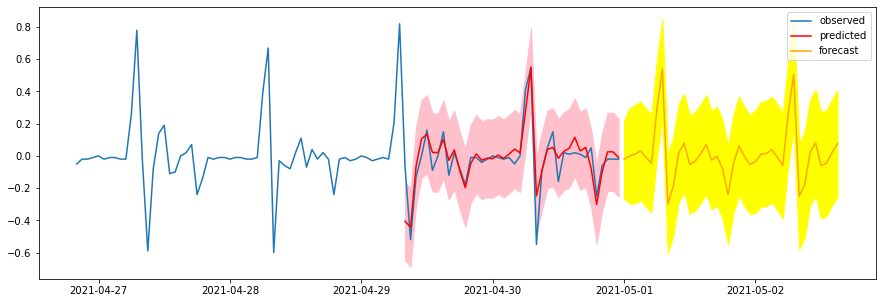

In [22]:
model = SARIMAX(df_diff['S1-Batt Volt'], order=(24,0,24))
results = model.fit()

mean_forecast_24 = get_prediction(results)
plt.show()

In [23]:
results.aic

-2751.615005135842

It is good to see that the AIC score of model with degree 24 is lower than degree 4 (lower is better) and the prediction in the later model can clearly show the pattern (represents seasonality). Therefore, visualizing things is somehow better.

We may want to return from difference to initial value.

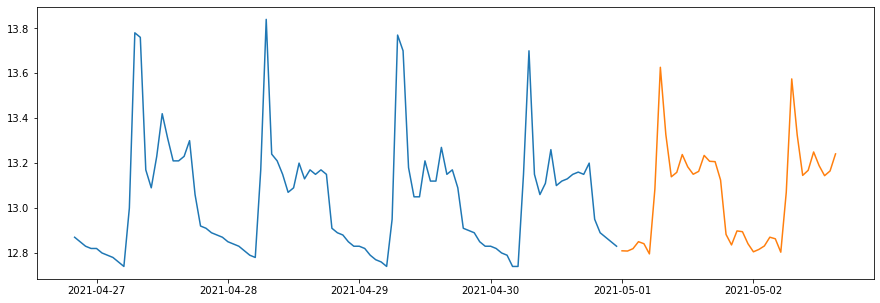

In [24]:
predict_volt = df_short['S1-Batt Volt'][-1] + np.cumsum(mean_forecast_24)

plt.plot(df_short.index[-100:], df_short['S1-Batt Volt'][-100:], label='observed')
plt.plot(mean_forecast_24.index, predict_volt, label='forecast')

plt.show()

## 2.3. VAR model

VAR model is used for Multivariate Time Series Forecasting, where multiple time series affect each other.

Reference: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

### 2.3.1. Testing Causation using Granger’s Causality Test

The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns

maxlag = 6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

matrix = grangers_causation_matrix(df_diff, variables = df_short.columns)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<AxesSubplot:>

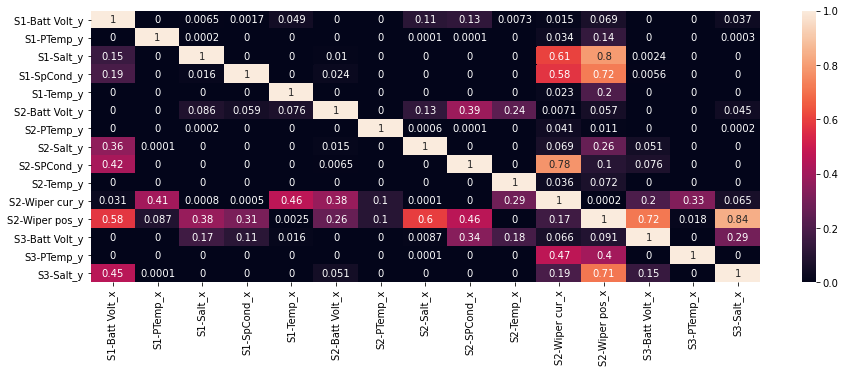

In [26]:
sns.heatmap(matrix, annot=True)

The above heatmap represents the p-value for hypothesis testing of each pair of features. For example, p-value for `S1-Batt Volt` to `S1-Salt` is 0.0065 < 0.05, therefore we can reject the null hypothesis of non-causation.

We might see that `S2-Wiper cur`, `S2-Wiper pos`, `S1-Batt Volt`, `S2-Batt Volt`, `S3-Batt Volt` is nearly not affect to any other features. Hence, we may need to remove these columns for this model.

In [27]:
df_cause = df_diff.drop(['S2-Wiper cur', 'S2-Wiper pos', 'S1-Batt Volt', 'S2-Batt Volt', 'S3-Batt Volt'], axis='columns')
df_cause.shape

(2135, 10)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '


<AxesSubplot:>

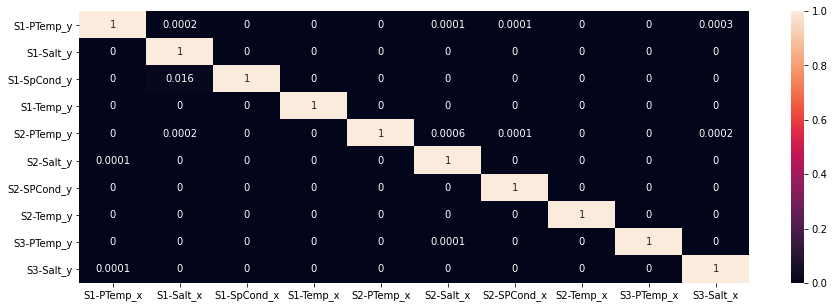

In [28]:
matrix = grangers_causation_matrix(df_cause, variables = df_cause.columns)
sns.heatmap(matrix, annot=True)

### 2.3.2. Cointegration test 

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

In [29]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_cause)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
S1-PTemp ::  7190.86   > 219.4051  =>   True
S1-Salt ::  6087.0    > 179.5199  =>   True
S1-SpCond ::  5135.93   > 143.6691  =>   True
S1-Temp ::  4304.27   > 111.7797  =>   True
S2-PTemp ::  3559.21   > 83.9383   =>   True
S2-Salt ::  2837.69   > 60.0627   =>   True
S2-SPCond ::  2121.91   > 40.1749   =>   True
S2-Temp ::  1485.04   > 24.2761   =>   True
S3-PTemp ::  864.51    > 12.3212   =>   True
S3-Salt ::  339.17    > 4.1296    =>   True


Split `df_cause` to dataset splits.

### 2.3.3. Stationary test

It has been done in section 2.2.1.

### 2.3.4. Apply the model

Firstly, we select the appropriate order for the model.

In [30]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(df_cause)
x = model.select_order(maxlags=30)
x.summary()

,AIC,BIC,FPE,HQIC
0,-14.31,-14.28,6.094e-07,-14.30
1,-16.78,-16.49,5.142e-08,-16.68
2,-17.39,-16.83,2.804e-08,-17.18
3,-17.85,-17.02,1.769e-08,-17.55
4,-18.12,-17.02,1.356e-08,-17.71
5,-18.41,-17.04*,1.009e-08,-17.91
6,-18.58,-16.94,8.521e-09,-17.98
7,-18.75,-16.84,7.229e-09,-18.05
8,-18.86,-16.68,6.454e-09,-18.06
9,-18.96,-16.52,5.812e-09,-18.07


We will test the model in order 3, 26 and 27 and try to print the summary of order 3.

In [31]:
model_fitted_lag_3 = model.fit(3)
model_fitted_lag_3.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, Aug, 2021
Time:                     09:47:16
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -17.0878
Nobs:                     2132.00    HQIC:                  -17.6101
Log likelihood:          -10848.1    FPE:                1.66393e-08
AIC:                     -17.9115    Det(Omega_mle):     1.44026e-08
--------------------------------------------------------------------
Results for equation S1-PTemp
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.002859         0.022023            0.130           0.897
L1.S1-PTemp          0.162112         0.039825            4.071           0.000
L1.S1-Salt           0.087127         0.137794            0.6

In [32]:
model_fitted_lag_26 = model.fit(26)

In [33]:
model_fitted_lag_27 = model.fit(27)

### 2.3.5. Serial Correlation of Residual

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [34]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted_lag_27.resid)

for col, val in zip(df.columns, out):
    def adjust(val, length= 6): return str(val).ljust(length)
    print(adjust(col), ':', round(val, 2))

S1-Batt Volt : 1.99
S1-PTemp : 2.0
S1-Salt : 2.0
S1-SpCond : 2.0
S1-Temp : 2.0
S2-Batt Volt : 2.0
S2-PTemp : 2.01
S2-Salt : 2.0
S2-SPCond : 2.01
S2-Temp : 2.0


All the above stats is close to 2, so they are quite alright.

### 2.3.6. Get forecast

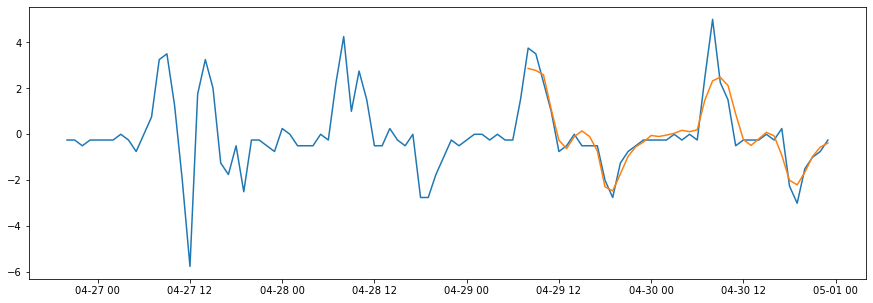

In [35]:
fc = model_fitted_lag_27.forecast(y=df_cause[:-40].values, steps=40)
plt.plot(df_cause.index[-100:], df_cause['S1-PTemp'][-100:], label='observed')
plt.plot(df_cause.index[-40:], fc[:, 0], label='forecast')

Revert from difference to initial values.

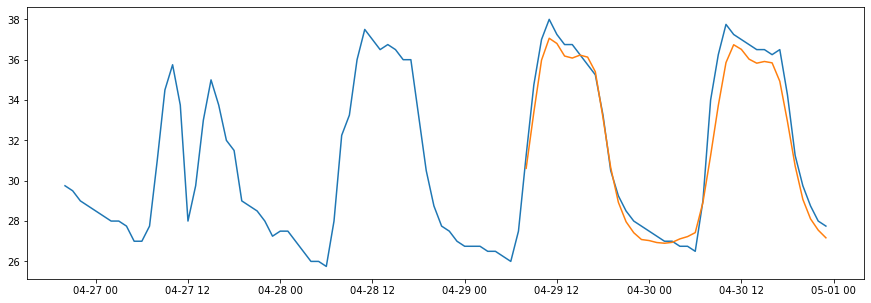

In [36]:
predict_ptemp = df_short['S1-PTemp'][-1] + np.cumsum(fc[:, 0])

plt.plot(df_short.index[-100:], df_short['S1-PTemp'][-100:], label='observed')
plt.plot(df_short.index[-40:], predict_ptemp, label='forecast')

plt.show()

## 2.4. CNN architecture

### 2.4.1. WindowGenerator in Tensorflow

This part is already shown in the notebook with Jena dataset. I just copied and pasted the code here.

In [139]:
n = len(df_cause)
split_train_size, split_val_size = 0.7, 0.2
train_df = df_cause[0 : int(n * split_train_size)]
val_df = df_cause[int(n * split_train_size) : int(n * (split_train_size + split_val_size))]
test_df = df_cause[int(n * (split_train_size + split_val_size)):]

n_features = df_cause.shape[1]

In [146]:
class WindowGenerator():
    """
    Create a window of consecutive samples of data.
    Use to make a set of predictions which can benefit training.
    ------
    Args:
        input_width (int):
            Number of consecutive history data.
        label_width (int):
            Number of future data we want to predict/show.
            If it is None, all the future data from 'shift' is shown.
        shift (int):
            Number of consecutive future data.
        train_df (pd.DataFrame):
            Training data.
        val_df (pd.DataFrame):
            Validation data.
        test_df (pd.DataFrame):
            Test data.
        label_columns (list of str, pd.Index or None):
            List of columns that we want to use.
    """
    
    def __init__(self, input_width, shift, label_width=None,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # Work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}
        
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        # slice(a, b) function will return a slice object.
        # arr[slice(a, b)] = arr[a:b]
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        """
        Convert list of consecutive inputs into a window of inputs and a window of labels (output).
        -------
        Args:
            features: EagerTensor
                List of consecutive inputs
        -------
        Returns:
            inputs: EagerTensor
            labels: EagerTensor
        """
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                    [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                    axis=-1
            )
        
        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.`
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='S1-PTemp', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, (8/3)*max_subplots))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [*10 minutes]')
        
    def make_dataset(self, data):
        """
        Convert the DataFrame into a tf.data.Dataset.
        ------
        Args:
            data: DataFrame
                The input data.
        ------
        Returns:
            ds: tf.data.Dataset of (input_window, label_window)    
        """
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,
        )

        ds = ds.map(self.split_window)
        
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.test))
            # And cache it for next time
            self._example = result
        return result

In [147]:
MAX_EPOCHS = 100
PATIENCE = 5

def compile_and_fit(model, window, patience=PATIENCE, path_checkpoint='model_checkpoint.h5', opt='Adam'):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                      patience=patience,
                                                      mode='min')
    
#     model_checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor="val_loss", 
#                                                           filepath=path_checkpoint,
#                                                           verbose=0,
#                                                           save_weights_only=True,
#                                                           save_best_only=True)
    
    model.compile(loss=tf.losses.MeanAbsoluteError(),
                  optimizer=opt)
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        verbose=0,
                        validation_data = window.val,
                        callbacks=[early_stopping])
    
    return history

In [148]:
def visualize_loss(history, title="Training and Validation Loss"):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(6,6))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [149]:
def training_package(model, window, plot_cols=['S1-Batt Volt']):
    print('Training model')
    history = compile_and_fit(model, window)
    
    print('Model summary')
    print(model.summary())
    
    print('Visualize loss')
    visualize_loss(history)
    
    print('Prediction result samples')
    for plot_col in plot_cols:
        window.plot(model=model, plot_col=plot_col)
    
    val_error = model.evaluate(window.val)
    test_error = model.evaluate(window.test)
    print(f'Validation error: {val_error}')
    print(f'Test error: {test_error}')

### 2.4.2. SimpleCNN

In [150]:
input_width = 24
label_width = 6

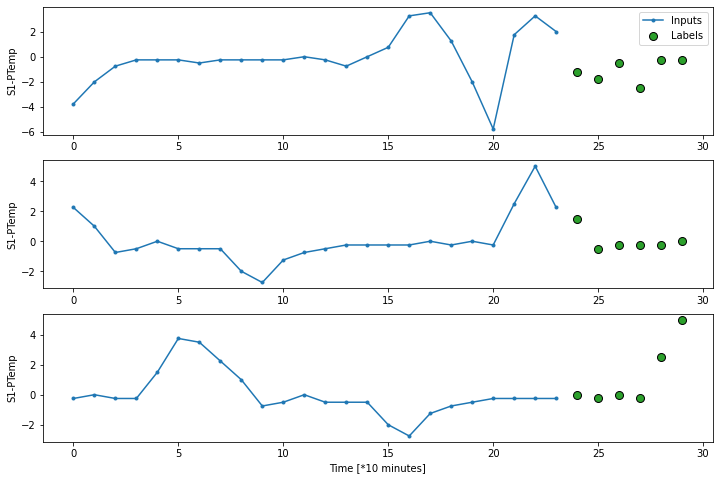

In [151]:
window = WindowGenerator(input_width=input_width,
                        label_width=label_width,
                        shift=label_width,
                        label_columns=[i for i in train_df.columns])
window.plot()

In [152]:
CONV_WIDTH = 18

multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_width*n_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([label_width, n_features])
])

Training model
Model summary
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_10 (Lambda)           (None, 18, 10)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1, 256)            46336     
_________________________________________________________________
dense_23 (Dense)             (None, 1, 60)             15420     
_________________________________________________________________
reshape_10 (Reshape)         (None, 6, 10)             0         
Total params: 61,756
Trainable params: 61,756
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


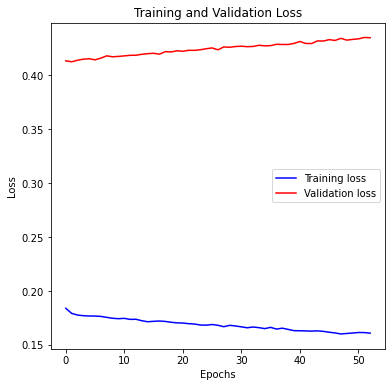

Prediction result samples
6/6 [==============================] - 0s 1ms/step - loss: 0.5319
Validation error: 0.4349272847175598
Test error: 0.5319389700889587


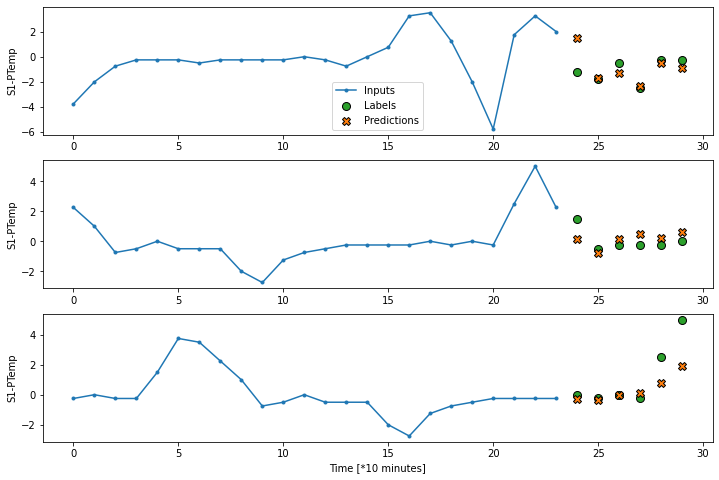

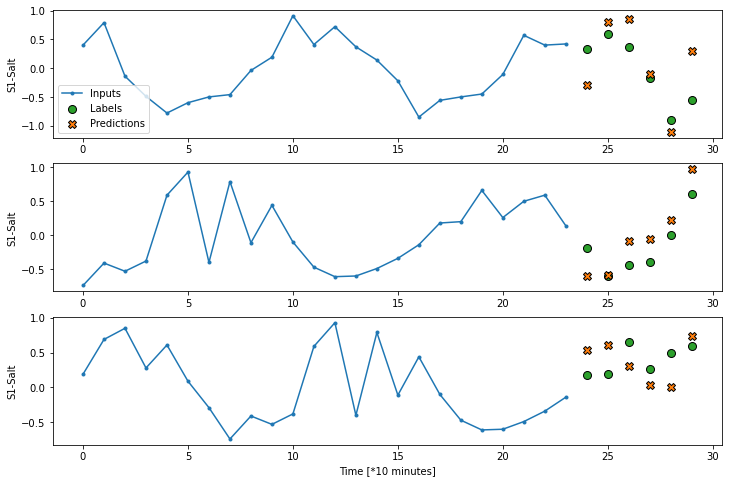

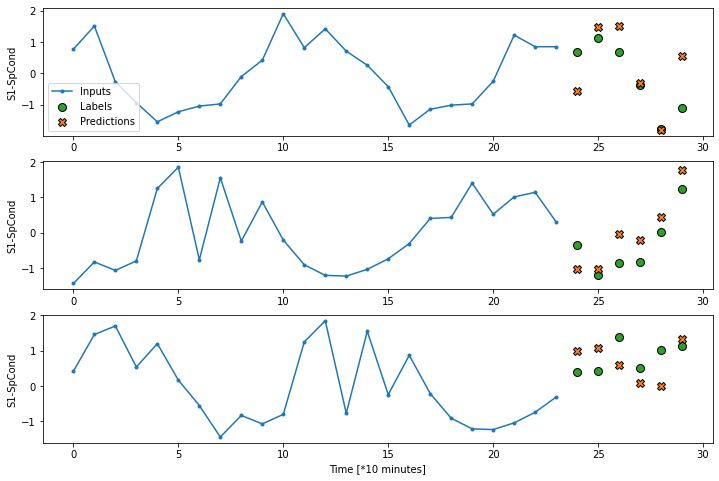

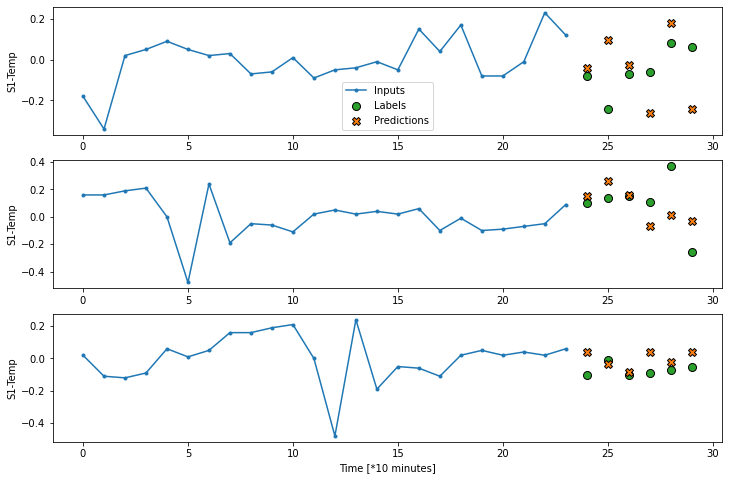

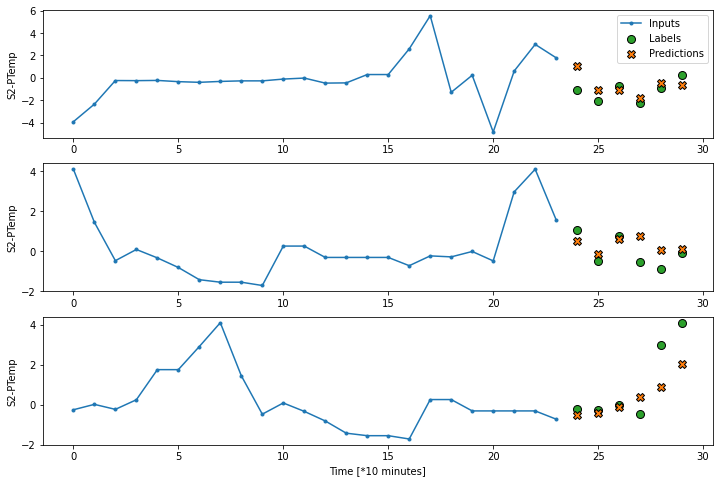

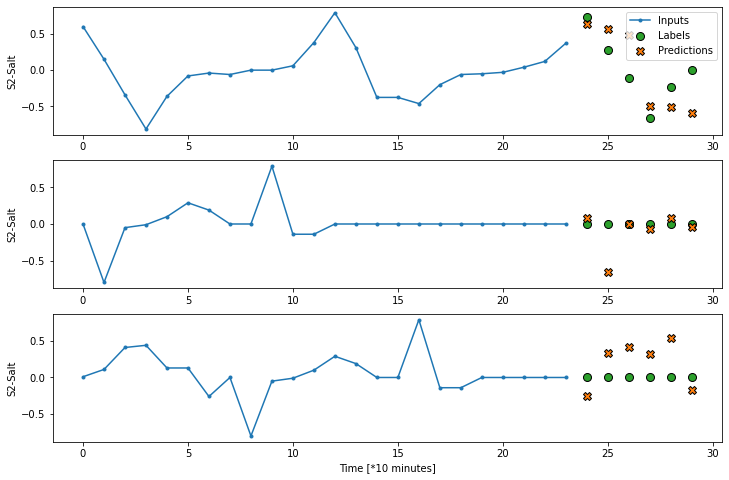

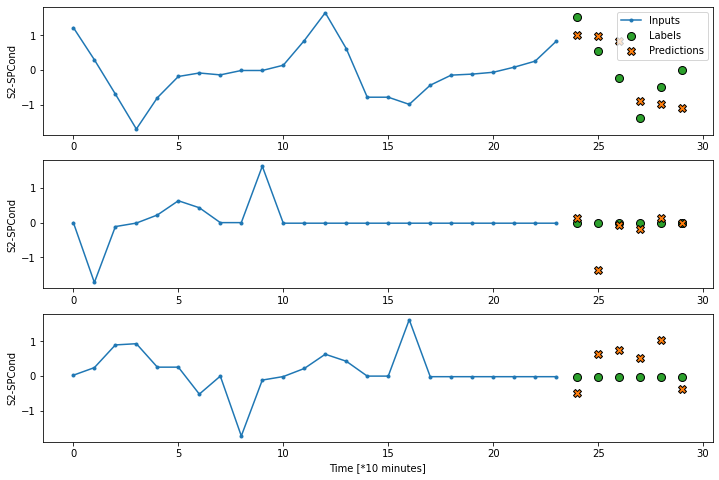

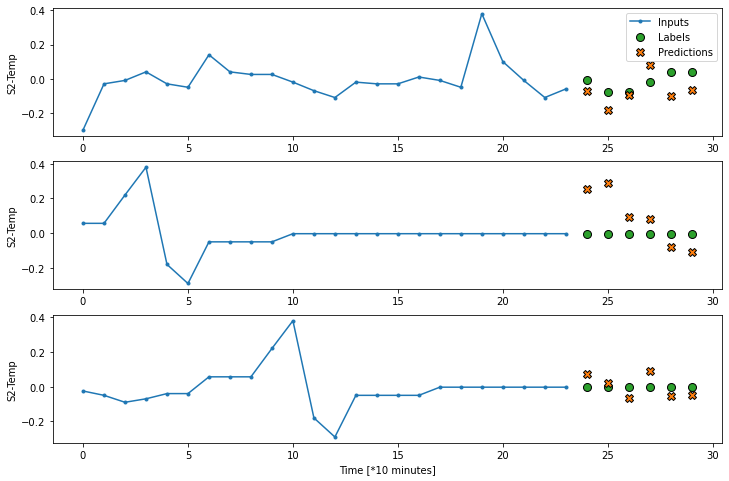

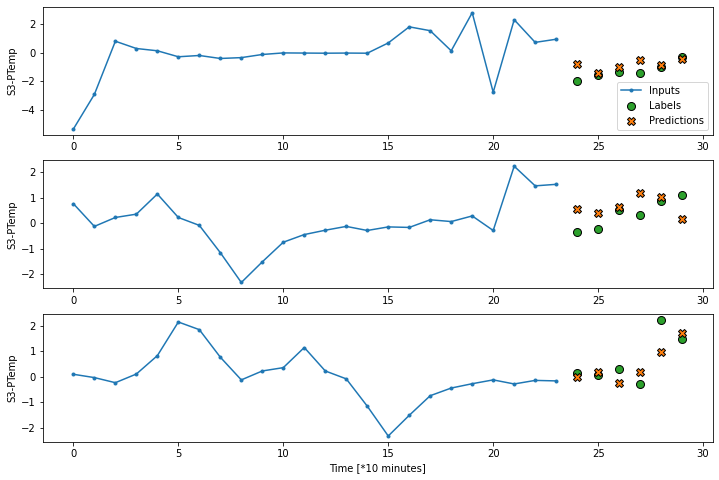

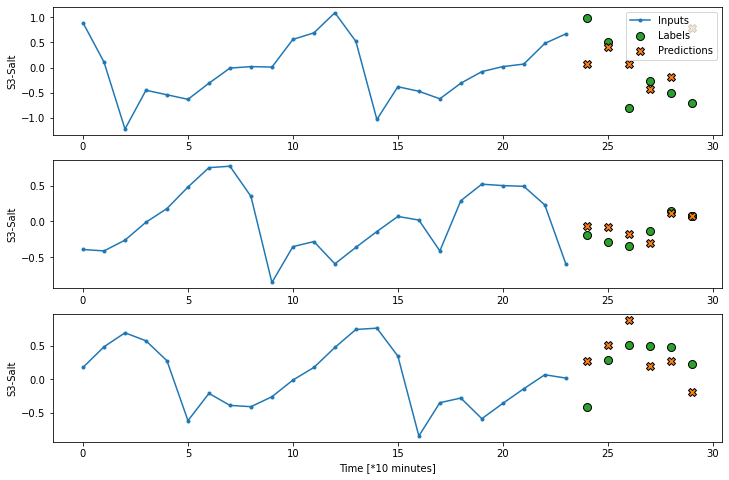

In [154]:
training_package(multi_conv_model, window, [i for i in df_cause.columns])

### 2.4.3. ResNet (has not completed)

The source code of ResNet for Time Series is found at https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline/blob/master/ResNet.py, but we will implement to fit our dataset.

*Pending for implementation work*

### 2.5. AR model in Deep Neural Network

References can be found at https://www.tensorflow.org/tutorials/structured_data/time_series#advanced_autoregressive_model

In [ ]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(n_features)
        
    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.lstm_rnn(inputs)

        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state
    
    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the LSTM state.
        prediction, state = self.warmup(inputs)

        # Insert the first prediction.
        predictions.append(prediction)

        # Run the rest of the prediction steps.
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.lstm_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output.
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions

Training model
Model summary
Model: "feed_back_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_cell_13 (LSTMCell)      multiple                  408       
_________________________________________________________________
rnn_13 (RNN)                 multiple                  408       
_________________________________________________________________
dense_24 (Dense)             multiple                  70        
Total params: 478
Trainable params: 478
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


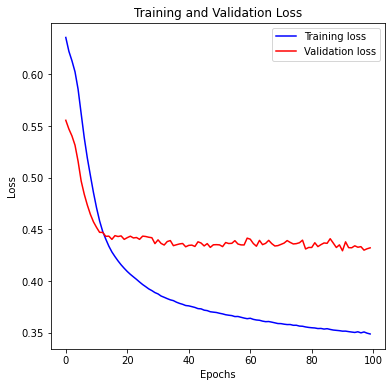

Prediction result samples
6/6 [==============================] - 0s 3ms/step - loss: 0.5136
Validation error: 0.4322023391723633
Test error: 0.5136085748672485


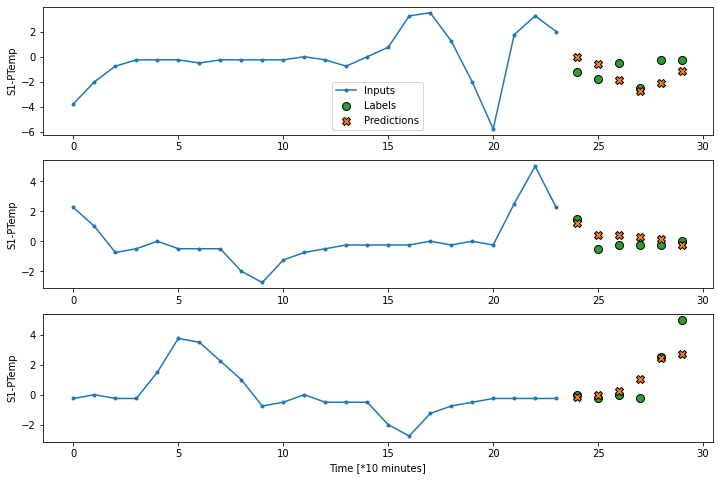

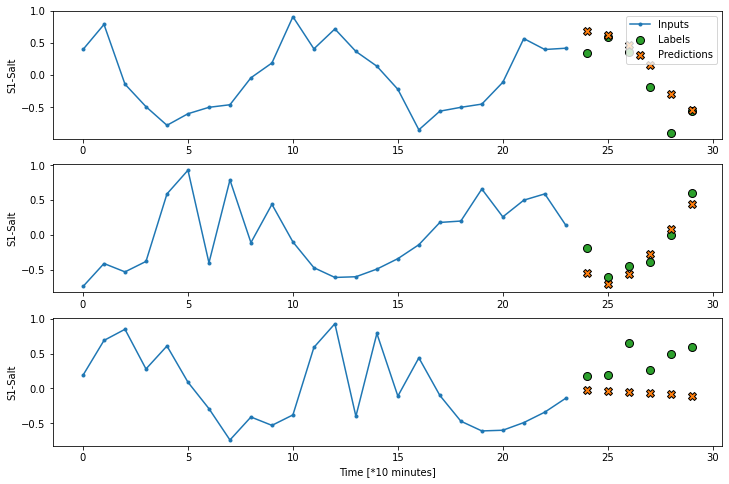

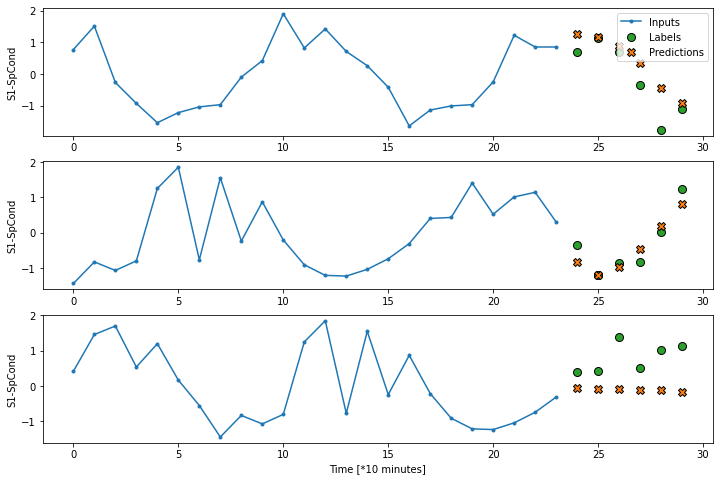

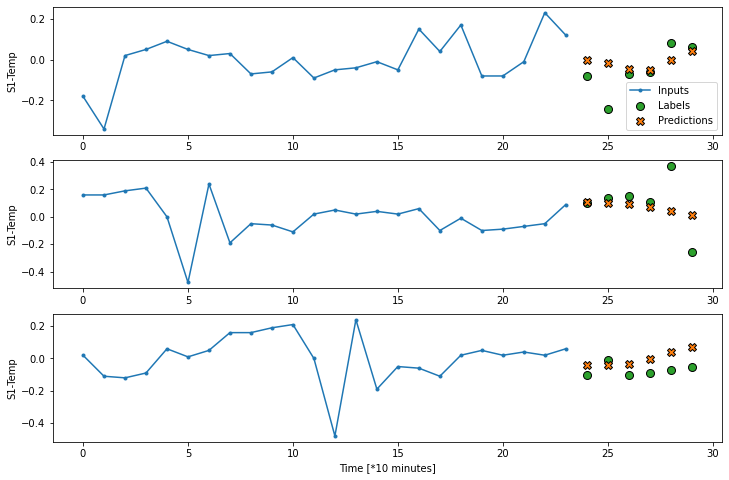

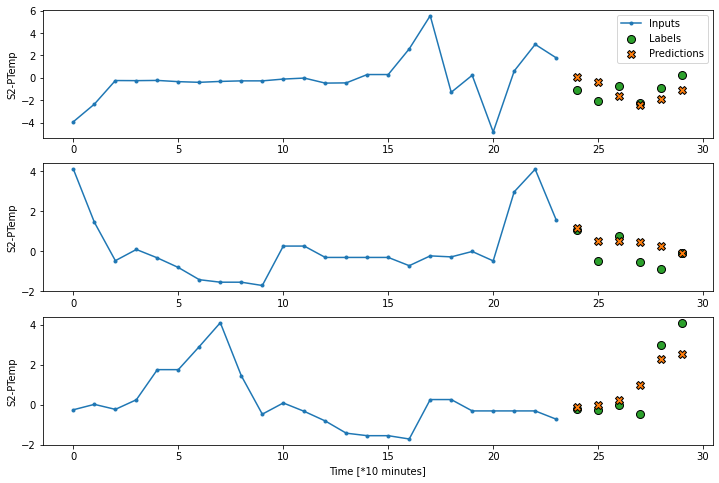

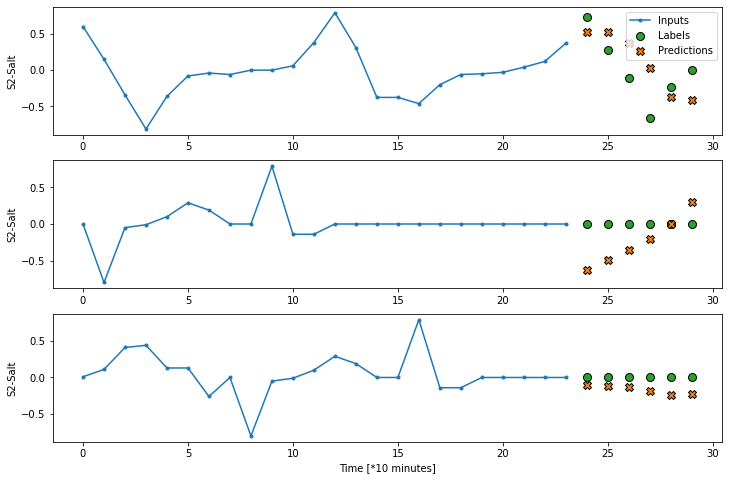

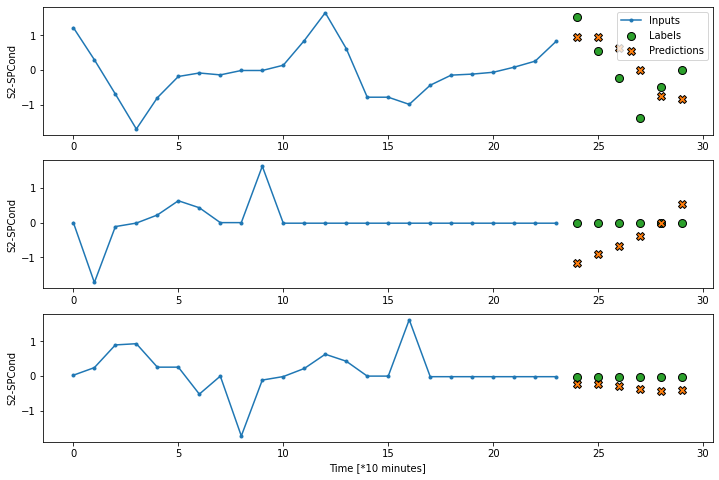

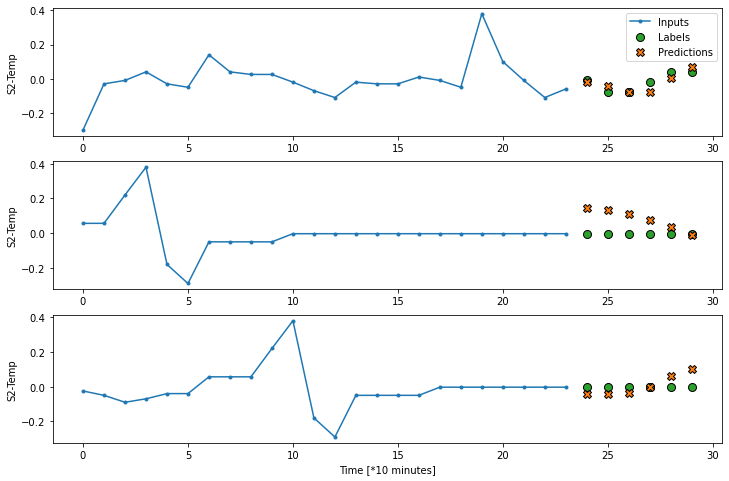

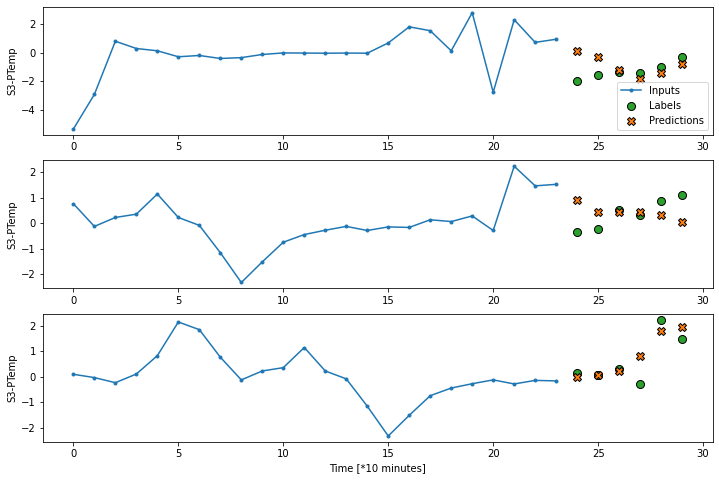

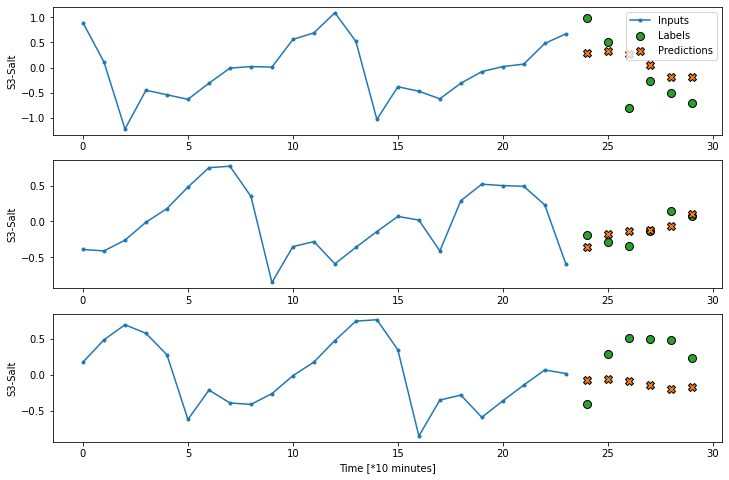

In [155]:
feedback_model = FeedBack(label_width, label_width)
training_package(feedback_model, window, [i for i in df_cause.columns])